In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split


from sklearn.multiclass import OneVsOneClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv ('/content/Diseases_Symptoms.csv')

In [3]:
data.shape
data.info()
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Code        400 non-null    int64 
 1   Name        400 non-null    object
 2   Symptoms    400 non-null    object
 3   Treatments  399 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.6+ KB


0

Index(['Code', 'Name', 'Symptoms', 'Treatments'], dtype='object')


<Axes: ylabel='Frequency'>

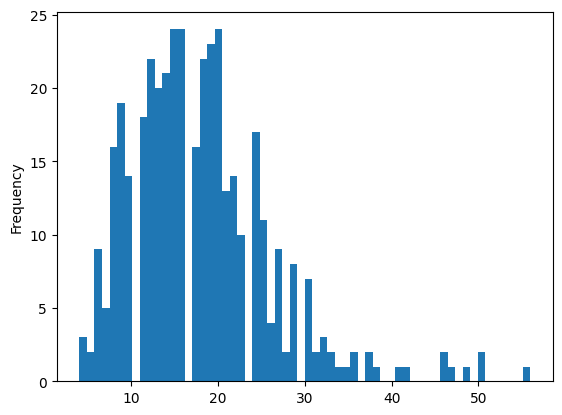

In [4]:
print(data.columns)
data['Name'].str.len().plot.hist(bins=60)

<Axes: ylabel='Frequency'>

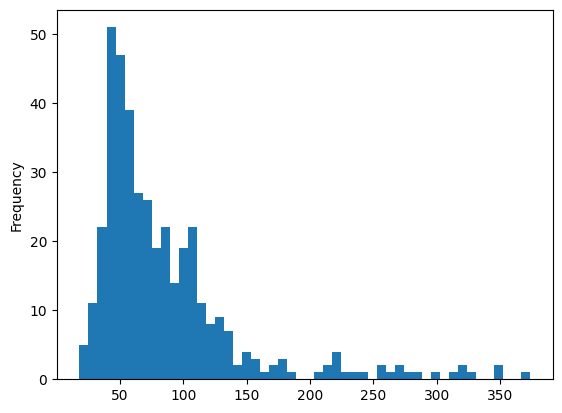

In [5]:
data['Symptoms'].str.len().plot.hist(bins=50)

Index(['Code', 'Name', 'Symptoms', 'Treatments'], dtype='object')


<Axes: ylabel='Frequency'>

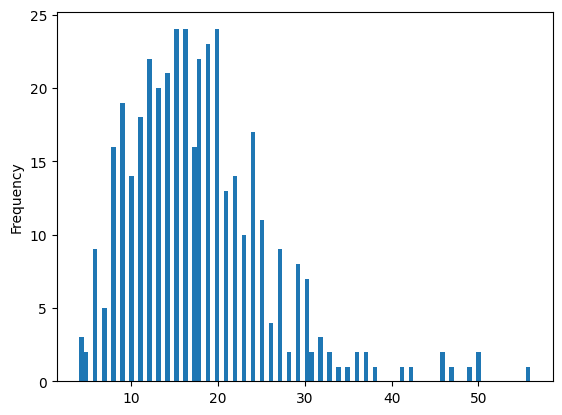

In [6]:
print(data.columns)
data['Name'].str.len().plot.hist(bins=100)

In [7]:
data.head()

,Code,Name,Symptoms,Treatments
0,1,Panic disorder,"Palpitations, Sweating, Trembling, Shortness o...","Antidepressant medications, Cognitive Behavior..."
1,2,Vocal cord polyp,"Hoarseness, Vocal Changes, Vocal Fatigue","Voice Rest, Speech Therapy, Surgical Removal"
2,3,Turner syndrome,"Short stature, Gonadal dysgenesis, Webbed neck...","Growth hormone therapy, Estrogen replacement t..."
3,4,Cryptorchidism,"Absence or undescended testicle(s), empty scro...",Observation and monitoring (in cases of mild o...
4,5,Ethylene glycol poisoning-1,"Nausea, vomiting, abdominal pain, General mala...","Supportive Measures, Gastric Decontamination, ..."


In [8]:
data.tail()

,Code,Name,Symptoms,Treatments
395,396,Urinary Stones (Kidney Stones),"Severe abdominal or back pain, blood in urine,...","Pain management, increased fluid intake, medic..."
396,397,Osteoporosis,"Fragile bones, loss of height over time, back ...","Calcium and vitamin D supplements, regular exe..."
397,398,Rheumatoid Arthritis,"Joint pain, stiffness, swelling, fatigue, loss...",Medications (nonsteroidal anti-inflammatory dr...
398,399,Type 1 Diabetes,"Frequent urination, Increased thirst, Weight loss","Insulin therapy, Blood sugar monitoring, Healt..."
399,400,Type 2 Diabetes,"Fatigue, Increased hunger, Slow healing of wounds","Oral medications, Insulin therapy (in some cas..."


In [9]:
type(data['Name'].iloc[0])

str

In [10]:
import ast


In [11]:
data['Name'].iloc[0]

'Panic disorder'

In [12]:
import ast

def convert_Name(Name_string):
  try:
    Name_list = ast.literal_eval(Name_string)
  except (SyntaxError, ValueError):
    Name_list = [Name_string]
  return Name_list

data['Name'] = data['Name'].apply(convert_Name)

In [13]:
data.head()

,Code,Name,Symptoms,Treatments
0,1,[Panic disorder],"Palpitations, Sweating, Trembling, Shortness o...","Antidepressant medications, Cognitive Behavior..."
1,2,[Vocal cord polyp],"Hoarseness, Vocal Changes, Vocal Fatigue","Voice Rest, Speech Therapy, Surgical Removal"
2,3,[Turner syndrome],"Short stature, Gonadal dysgenesis, Webbed neck...","Growth hormone therapy, Estrogen replacement t..."
3,4,[Cryptorchidism],"Absence or undescended testicle(s), empty scro...",Observation and monitoring (in cases of mild o...
4,5,[Ethylene glycol poisoning-1],"Nausea, vomiting, abdominal pain, General mala...","Supportive Measures, Gastric Decontamination, ..."


In [14]:
 y = data['Name']
 y

,Name
0,[Panic disorder]
1,[Vocal cord polyp]
2,[Turner syndrome]
3,[Cryptorchidism]
4,[Ethylene glycol poisoning-1]
...,...
395,[Urinary Stones (Kidney Stones)]
396,[Osteoporosis]
397,[Rheumatoid Arthritis]
398,[Type 1 Diabetes]


In [15]:
multilabel = MultiLabelBinarizer()


In [16]:
data['Name'].apply(type).value_counts()
data['Name'] = data['Name'].apply(str)
y = multilabel.fit_transform(data['Name'])

y

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 0]])

In [17]:
multilabel.classes_

array([' ', '"', "'", '(', ')', ',', '-', '/', '1', '2', '3', 'A', 'B',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
       'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', '[', ']', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ö'], dtype=object)

In [18]:
pd.DataFrame(y, columns=multilabel.classes_)

,,"""",',(,),",",-,/,1,2,...,r,s,t,u,v,w,x,y,z,ö
0,1,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,0,0
4,1,0,1,0,0,0,1,0,1,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,0,1,1,1,0,0,0,0,0,...,1,1,1,0,0,0,0,1,0,0
396,0,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
397,1,0,1,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
398,1,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0


In [19]:
tfidf = TfidfVectorizer(analyzer='word', max_features= 1000)
X = tfidf.fit_transform(data['Symptoms'])
X

<400x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 4366 stored elements in Compressed Sparse Row format>

In [20]:
tfidf.vocabulary_

{'palpitations': 620,
 'sweating': 852,
 'trembling': 906,
 'shortness': 772,
 'of': 589,
 'breath': 102,
 'fear': 317,
 'losing': 507,
 'control': 178,
 'dizziness': 247,
 'hoarseness': 416,
 'vocal': 963,
 'changes': 128,
 'fatigue': 315,
 'short': 771,
 'stature': 822,
 'gonadal': 376,
 'dysgenesis': 263,
 'webbed': 975,
 'neck': 562,
 'lymphedema': 515,
 'absence': 7,
 'or': 600,
 'undescended': 929,
 'testicle': 872,
 'empty': 275,
 'scrotum': 752,
 'smaller': 792,
 'underdeveloped': 925,
 'inguinal': 451,
 'hernia': 412,
 'abnormal': 3,
 'positioning': 661,
 'the': 877,
 'higher': 414,
 'in': 436,
 'groin': 381,
 'area': 41,
 'nausea': 559,
 'vomiting': 965,
 'abdominal': 2,
 'pain': 614,
 'general': 368,
 'malaise': 518,
 'weakness': 974,
 'increased': 443,
 'thirst': 881,
 'frequent': 354,
 'urination': 944,
 'metabolic': 533,
 'acidosis': 14,
 'apid': 38,
 'breathing': 103,
 'rapid': 690,
 'heart': 403,
 'rate': 693,
 'confusion': 165,
 'headache': 397,
 'seizures': 756,
 'dec

In [21]:
X.shape, y.shape

((400, 1000), (400, 62))

In [22]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [23]:
data.dropna(subset=['Symptoms'], inplace=True)


In [24]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)



In [25]:
tfidf = TfidfVectorizer(analyzer='word', max_features=1000)
X = tfidf.fit_transform(data['Symptoms'])
y = data['Name'].values


# **Build** **Model**

In [26]:

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier

sgd = SGDClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
nb_classifier = MultinomialNB()
estimators = [ ('lr', lr),('nb_classifier', nb_classifier) ]
stk = StackingClassifier(estimators=estimators,final_estimator= RandomForestClassifier())

In [27]:
# prompt: do binarization
from sklearn.preprocessing import LabelBinarizer  # Import the binarizer
bnr = LabelBinarizer()

y_train_bin = bnr.fit_transform(y_train)
y_test_bin = bnr.transform(y_test)


In [28]:
def j_score(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    jaccard = 0.0
    for i in range(num_classes):
        true_positives = np.sum(np.logical_and(y_true == i, y_pred == i))
        false_positives = np.sum(np.logical_and(y_true != i, y_pred == i))
        false_negatives = np.sum(np.logical_and(y_true == i, y_pred != i))
        jaccard += true_positives / (true_positives + false_positives + false_negatives)
    return jaccard / num_classes * 100


In [29]:
def j_score(y_true, y_pred):
    jaccard = np.minimum(y_true, y_pred).sum(axis = 1)/np.maximum(y_true,y_pred).sum(axis = 1)
    return jaccard.mean()*100

def print_score(y_pred,clf):
  print("Clf:",clf.__class__.__name__)
  print('Jacard score: {}'.format(j_score(y_test,y_pred)))
  print('----')

# **Logistic Regression**

In [30]:
from sklearn.multiclass import OneVsRestClassifier

lr = LogisticRegression(penalty='l2')

for classifier in [sgd, lr, svc, dtc, rfc, gbc, abc,nb_classifier]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print_score(y_pred,classifier)

Clf: SGDClassifier
Jacard score: 49.809765877909776
----
Clf: LogisticRegression
Jacard score: 55.71403620309934
----
Clf: LinearSVC
Jacard score: 52.3074870043191
----
Clf: DecisionTreeClassifier
Jacard score: 46.521607365117596
----
Clf: RandomForestClassifier
Jacard score: 53.595530031270044
----
Clf: GradientBoostingClassifier
Jacard score: 52.086501533095955
----
Clf: AdaBoostClassifier
Jacard score: 48.190920171829575
----
Clf: MultinomialNB
Jacard score: 54.67201565470806
----


In [31]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import jaccard_score, classification_report

clf = OneVsRestClassifier(lr)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", j_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  55.71403620309934
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        80
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        19
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00         8
          16       0.00     

# **Decision Tree Classifier**

In [32]:
from sklearn.multiclass import OneVsRestClassifier

dtc = DecisionTreeClassifier()

for classifier in [sgd, lr, svc, dtc, rfc, gbc, abc,nb_classifier]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print_score(y_pred,classifier)

Clf: SGDClassifier
Jacard score: 50.07165770794978
----
Clf: LogisticRegression
Jacard score: 55.71403620309934
----
Clf: LinearSVC
Jacard score: 52.3074870043191
----
Clf: DecisionTreeClassifier
Jacard score: 47.67889032377649
----
Clf: RandomForestClassifier
Jacard score: 53.39898802336967
----
Clf: GradientBoostingClassifier
Jacard score: 52.27876842312289
----
Clf: AdaBoostClassifier
Jacard score: 47.9333691648236
----
Clf: MultinomialNB
Jacard score: 54.67201565470806
----


In [33]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import jaccard_score, classification_report

clf = OneVsRestClassifier(dtc)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", j_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  48.20411733784552
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78        58
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        80
           3       0.20      0.20      0.20         5
           4       0.14      0.20      0.17         5
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.22      0.17      0.19        12
          12       0.00      0.00      0.00         3
          13       0.30      0.16      0.21        19
          14       0.38      0.28      0.32        18
          15       0.00      0.00      0.00         8
          16       0.00     

# **LinearSVC**

In [34]:
from sklearn.multiclass import OneVsRestClassifier

svc = LinearSVC()

for classifier in [sgd, lr, svc, dtc, rfc, gbc, abc,nb_classifier]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print_score(y_pred,classifier)

Clf: SGDClassifier
Jacard score: 49.71423265844386
----
Clf: LogisticRegression
Jacard score: 55.71403620309934
----
Clf: LinearSVC
Jacard score: 52.3074870043191
----
Clf: DecisionTreeClassifier
Jacard score: 47.90813226060358
----
Clf: RandomForestClassifier
Jacard score: 53.80336378312427
----
Clf: GradientBoostingClassifier
Jacard score: 52.64070936796909
----
Clf: AdaBoostClassifier
Jacard score: 47.7515677923735
----
Clf: MultinomialNB
Jacard score: 54.67201565470806
----


In [35]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import jaccard_score, classification_report

clf = OneVsRestClassifier(svc)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", j_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  52.3074870043191
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.86      0.79        58
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        80
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.40      0.17      0.24        12
          12       0.00      0.00      0.00         3
          13       0.67      0.11      0.18        19
          14       1.00      0.11      0.20        18
          15       0.00      0.00      0.00         8
          16       0.00      

# **SGDClassifier**

In [36]:
from sklearn.multiclass import OneVsRestClassifier

sgd = SGDClassifier()

for classifier in [sgd, lr, svc, dtc, rfc, gbc, abc,nb_classifier]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print_score(y_pred,classifier)

Clf: SGDClassifier
Jacard score: 49.279430863932234
----
Clf: LogisticRegression
Jacard score: 55.71403620309934
----
Clf: LinearSVC
Jacard score: 52.3074870043191
----
Clf: DecisionTreeClassifier
Jacard score: 47.38830817685054
----
Clf: RandomForestClassifier
Jacard score: 53.879990924264206
----
Clf: GradientBoostingClassifier
Jacard score: 52.509316843290556
----
Clf: AdaBoostClassifier
Jacard score: 47.87747758068149
----
Clf: MultinomialNB
Jacard score: 54.67201565470806
----


In [37]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import jaccard_score, classification_report

clf = OneVsRestClassifier(sgd)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", j_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  49.402982331533515
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        58
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        80
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.29      0.33      0.31        12
          12       0.00      0.00      0.00         3
          13       0.38      0.16      0.22        19
          14       0.43      0.17      0.24        18
          15       0.00      0.00      0.00         8
          16       0.00    

# **Random Forest Classifier**

In [38]:
from sklearn.multiclass import OneVsRestClassifier

rfc = RandomForestClassifier()

for classifier in [sgd, lr, svc, dtc, rfc, gbc, abc,nb_classifier]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print_score(y_pred,classifier)

Clf: SGDClassifier
Jacard score: 49.54273313460909
----
Clf: LogisticRegression
Jacard score: 55.71403620309934
----
Clf: LinearSVC
Jacard score: 52.3074870043191
----
Clf: DecisionTreeClassifier
Jacard score: 47.701177550395144
----
Clf: RandomForestClassifier
Jacard score: 53.855191346122155
----
Clf: GradientBoostingClassifier
Jacard score: 51.718752692093226
----
Clf: AdaBoostClassifier
Jacard score: 48.4438131764869
----
Clf: MultinomialNB
Jacard score: 54.67201565470806
----


In [39]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import jaccard_score, classification_report

clf = OneVsRestClassifier(rfc)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", j_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  53.77724619321528
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.97      0.82        58
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        80
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        19
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00         8
          16       0.00     

# **Gradient Boosting Classifier**

In [40]:
from sklearn.multiclass import OneVsRestClassifier

gbc = GradientBoostingClassifier()

for classifier in [sgd, lr, svc, dtc, rfc, gbc, abc,nb_classifier]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print_score(y_pred,classifier)

Clf: SGDClassifier
Jacard score: 49.339227974785416
----
Clf: LogisticRegression
Jacard score: 55.71403620309934
----
Clf: LinearSVC
Jacard score: 52.3074870043191
----
Clf: DecisionTreeClassifier
Jacard score: 47.15231637488149
----
Clf: RandomForestClassifier
Jacard score: 53.78496145181602
----
Clf: GradientBoostingClassifier
Jacard score: 52.81213728580215
----
Clf: AdaBoostClassifier
Jacard score: 48.68954842042356
----
Clf: MultinomialNB
Jacard score: 54.67201565470806
----


In [41]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import jaccard_score, classification_report

clf = OneVsRestClassifier(gbc)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", j_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  52.13322985702595
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.95      0.81        58
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        80
           3       0.50      0.20      0.29         5
           4       0.50      0.20      0.29         5
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.40      0.17      0.24        12
          12       0.00      0.00      0.00         3
          13       0.40      0.11      0.17        19
          14       0.25      0.06      0.09        18
          15       0.00      0.00      0.00         8
          16       0.00     

# **AdaBoost Classifier**

In [42]:
from sklearn.multiclass import OneVsRestClassifier

abc = AdaBoostClassifier()

for classifier in [sgd, lr, svc, dtc, rfc, gbc, abc,nb_classifier]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print_score(y_pred,classifier)

Clf: SGDClassifier
Jacard score: 49.05648845016316
----
Clf: LogisticRegression
Jacard score: 55.71403620309934
----
Clf: LinearSVC
Jacard score: 52.3074870043191
----
Clf: DecisionTreeClassifier
Jacard score: 47.55802241883629
----
Clf: RandomForestClassifier
Jacard score: 54.27833959233921
----
Clf: GradientBoostingClassifier
Jacard score: 52.18218386718774
----
Clf: AdaBoostClassifier
Jacard score: 47.973301790914604
----
Clf: MultinomialNB
Jacard score: 54.67201565470806
----


In [43]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import jaccard_score, classification_report

clf = OneVsRestClassifier(abc)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", j_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  48.83893220310128
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        58
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        80
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.20      0.17      0.18        12
          12       0.00      0.00      0.00         3
          13       0.43      0.16      0.23        19
          14       0.22      0.22      0.22        18
          15       0.00      0.00      0.00         8
          16       0.00     

# **Naive Bayes**

In [44]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

for classifier in [sgd, lr, svc, dtc, rfc, gbc, abc,nb_classifier]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print_score(y_pred,classifier)

Clf: SGDClassifier
Jacard score: 49.6264161828994
----
Clf: LogisticRegression
Jacard score: 55.71403620309934
----
Clf: LinearSVC
Jacard score: 52.3074870043191
----
Clf: DecisionTreeClassifier
Jacard score: 48.10243968916149
----
Clf: RandomForestClassifier
Jacard score: 54.100663212636135
----
Clf: GradientBoostingClassifier
Jacard score: 52.27069340761291
----
Clf: AdaBoostClassifier
Jacard score: 48.38222607182547
----
Clf: MultinomialNB
Jacard score: 54.67201565470806
----


In [46]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import jaccard_score, classification_report

clf = OneVsRestClassifier(nb_classifier)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", j_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  54.67201565470806
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.98      0.83        58
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        80
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        19
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00         8
          16       0.00     

# **Stacking Classifier**

In [58]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import jaccard_score, classification_report

estimators = [
    ('lr', LogisticRegression()),
    ('nb_classifier', MultinomialNB())
]

clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(),
    cv=StratifiedKFold(n_splits=2)
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", jaccard_score(y_test, y_pred, average='macro')*10000)  # Average for multiclass

Accuracy:  89.28571428571428
